# Load CSV

## load_csv.py
### load_csv(file_path)
Definition: Load the csv tracking data into numpy matrix.

           format of each row: frame_id, fish_1, x, y, rad ,fish_2...

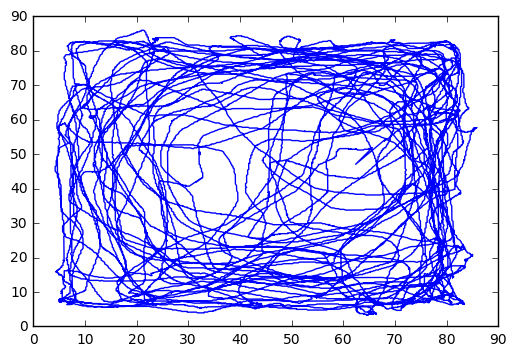

In [4]:
import sys
sys.path.append('..')
from features.load_csv import *
path = 'C:/Users/Tim/Dropbox/FUB/PROJECTS/MeSoDiSy_2016/data/record_150422T105953/corrected csv/41-34676.csv'
dat  = load_csv(path)

%matplotlib inline
import matplotlib.pyplot as plt

# plot trajectory of first fish
plt.plot(dat[:, 2], dat[:, 3])


# Features

## Motion velocity
### motion_velocity(dat)
Definition: Get the motion velocity of all fish for all frames. The motion velocity is defined as the length of the vector between consecutive fish positions. Note that motion velocity is forward motion for fish (we assume they can only go forward).
            
           param dat: formative tracking data, n rows;
           
           return:    (n-1 * fish_num) motion velocity matrix

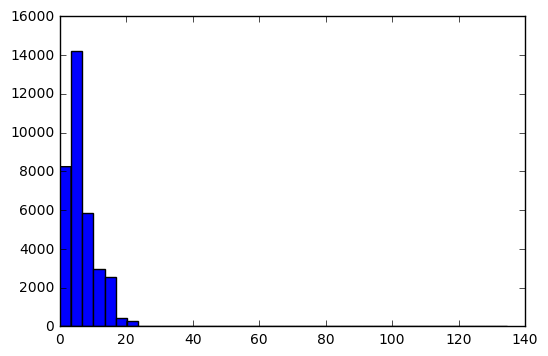

In [5]:
from features.features import *
vmot = motion_velocity(dat)

# plot histogram of motion velocity (multiply to convert from cm/frame to cm/second)
plt.hist(vmot[:,1] * 30, 40);



## Turning velocity
### turning_velocity(dat)
Definition: Get the turning velocities of all fish for all frames.

           param dat: formative tracking data, n rows. 
            
           return:    the (n-1 * fish_num) turning velcotiy matrix



In [6]:
vt_matrix = turning_velocity(dat)

..\features\features.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  X = np.zeros(shape=(r-1, fish_num))


TypeError: 'float' object cannot be interpreted as an integer

## Relative position of fish

### Vector
#### vector_a2b(dat, id_a, id_b)
Definition: Get fish a to fish b vector for all frames.

           param dat:  formative tracking data, n rows; 
           param id_a: the id of fish a; 
           param id_b: the id of fish b. 
            
           return:     the (n*2) fish a to fish b matrix
            
### Link angle
#### linked_angle(dat, id_a, id_b)
Definition: Get the linked angle of fish a to fish b for all frames.

           param dat:  formative tracking data, n rows; 
           param id_a: the id of fish a; 
           param id_b: the id of fish b. 
        
           return: (n*1) linked angle matrix



In [ ]:
fish1_to_fish2_vector_matrix        = vectro_a2b(dat, 1, 2)
fish1_to_fish2_linked_angle_matrix  = linked_angle(dat, 1, 2)

## Relative velocities
### relative_velocities(dat, id_a, id_b)
Definition: Get the ralative velocities(forward and turning) of fish b to fish a for all frames.

           param dat:  formative tracking data, n rows; 
           param id_a: the id of fish a; 
           param id_b: the id of fish b. 
           
           return:     the (n*2) relative velocities[vf, vt] matrix

In [ ]:
fish2_to_fish1_relative_v_matrix = relative_velocities(dat, 1, 2)

## Distances to nearby fish
### nearby_fish(dat, fish_id)
Definition: Get the sorted distance of all other fish.

           param dat:     formative tracking data, n rows;
           param fish_id: the id of fish that we calculated. 
           
           return:        sorted distance (n * fish_num-1) matrix; 
                          id-map (n * fish_num-1) matrix of the distance matrix

In [ ]:
fish1s_distance_of_nearby_fish_matrix, id_map_of_distance_matrix = nearby_fish(dat, 1)

## Relative orientation of nearby fish
### Included angle
#### included_angle(dat, id_a, id_b)
Definition: Get the included_angle between fish a and fish b for all frames (orientation of fish b - orientation of fish a)
    
           param dat:  formative tracking data, n rows; 
           param id_a: the id of fish a; :param id_b: the id of fish b. 
           
           return:     (n*1) included angle matrix:

In [ ]:
included_angle_of_fish1_to_fish2_matrix = included_angle(dat, 1, 2)

## Distances to the tank wall for a number of ray traces
### dist_to_tank(dat, fish_id, rays_num=5, view_field=3.141592653589793)
Definition: Get the distances form fish position to tank along the rays (left to right) 

           param dat:        formative tracking data, n rows; 
           param fish_id:    the id of fish that we calculated; 
           param rays_num:   the number of the rays(must be odd number), default 5;
           param view_field: the angle of view of the fish, default Pi.
           
           return:           (n*rays_num) distance matrix

In [ ]:
distance_to_tank_matrix_of_fish1 = dist_to_tank(dat, 1)

## Forward and turning accelerations
### Forward acceleration
#### forward_acc(dat, delta_t=1)
Definition: Get the forward accelerations of all fish for all frames, acc(t) = (vf(t+delta_t)-vf(t)) / delta_t 

           param dat:     formative tracking data, n rows; 
           param delta_t: the duration.
           
           return:        the (n - delta_t * fish_num) forward acceleration matrix
           
### Turning acceleration
#### turning_acc(dat, delta_t=1)
Definition: Get the turning accelerations of all fish for all frames acc(t) = (vt(t+delta_t)-vt(t)) / delta_t 

           param dat:     formative tracking data, n rows; 
           param delta_t: the duration.
           
           return:        the (n - delta_t * fish_num) turning acceleration matrix

In [ ]:
vf_acc_matrix = forward_acc(dat, delta_t=1)
vt_acc_matrix = turning_acc(dat, delta_t=1)

## Relative accelerations
### Relative forward acceleration
#### relative_vf_acc(dat, id_a, id_b, delta_t=1)
Definition: Get the acceleration of the relative forward velocity of fish b to fish a for all frames.

           Let rvf(t) be the relative forward velocity of fish a to fish b at frame t
           acc(t) = (rvf(t+delta_t) - rvf(t)) / delta_t

           param dat:  formative tracking data, n rows; 
           param id_a: the id of fish a; 
           param id_b: the id of fish b.
           
           return:     the (n - delta_t * fish_num) relative forward velocity acceleration matrix
           
### Relative linked angle acceleration 
#### relative_linked_angle_acc(dat, id_a, id_b, delta_t=1)
Definition: Get the acceleration of the linked angle of fish a to fish b for all frames.

           let a(t) be the linked angle of fish a to fish b at frame t.
           acc(t) = (a(t+delta_t)-a(t)) / delta_t 
           
           param dat:  formative tracking data, n rows; 
           param id_a: the id of fish a; 
           param id_b: the id of fish b. 
           
           return:     the (n - delta_t * fish_num) relative linked angle acceleration matrix

In [ ]:
relative_vf_acceleration_of_fish2_to_fish1           = relative_vf_acc(dat, 1, 2)
relative_linked_angle_acceleration_of_fish1_to_fish2 = relative_linked_angle_acc(dat, 1, 2)